In [1]:
#Steop 0: import libraries
import pandas as pd
import torch
import torch.nn as nn #✨
import torch.optim as optim#✨
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

In [2]:
# Step 1: Data Creation and Exploration
# Generating synthetic data:
data = {"Temp": np.arange (10,34, 0.3),
        "Sales" :[50 +1.5 *temp+10*torch.rand(1).item()
        for temp in np.arange (10,34,0.3)]}
ice_cream = pd.DataFrame(data)

In [3]:
ice_cream

,Temp,Sales
0,10.0,68.627702
1,10.3,66.228330
2,10.6,72.056365
3,10.9,72.252690
4,11.2,67.902925
...,...,...
75,32.5,101.614733
76,32.8,108.629079
77,33.1,103.121641
78,33.4,107.185159


Text(0, 0.5, 'Sales')

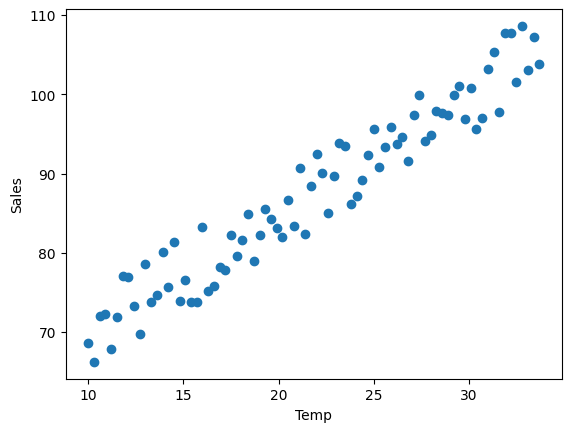

In [4]:
plt.scatter(ice_cream["Temp"],ice_cream["Sales"])
plt.xlabel("Temp")
plt.ylabel("Sales")

In [5]:
# Step 2: Preprocessing
X = ice_cream[['Temp']]
y = ice_cream['Sales']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)#  כמו  reshape
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

In [11]:
 torch.tensor(y.values, dtype=torch.float32).view(-1, 1).shape

torch.Size([80, 1])

In [13]:
# Step 3: Model Building
class LinearRegressionModel(nn.Module):
  def __init__(self, input_size):
    super().__init__()
    self.linear = nn.Linear(input_size,1)
    #if i had hidden layers...
    #if ihad more ...
    #every layer is a row

  def forward(self, X):
    return self.linear(X)



In [31]:
model = LinearRegressionModel(X_train.shape[1]) #num of columns

In [17]:
X_train.shape[1] #num of columns

1

In [28]:
# Training loop
#3 loss function
loss_fn = nn.MSELoss()
#4 optimazer
optimazer = optim.SGD(model.parameters(),lr=0.01)
epochs =550
train_loss_values = []

for epoch in range(epochs):
  model.train() # כניסה למצב אימון

  y_pred = model(X_train) #אימון חיזוי

  loss = loss_fn (y_pred, y_train) #חישוב עלות.הפסד

  train_loss_values.append(loss.item()) # סתם להיום לראות מה קורה

  optimazer.zero_grad() # איפוס הנגזרות

  loss.backward() # חישוב גרדיאנט

  optimazer.step() #עדכון פרמטרים


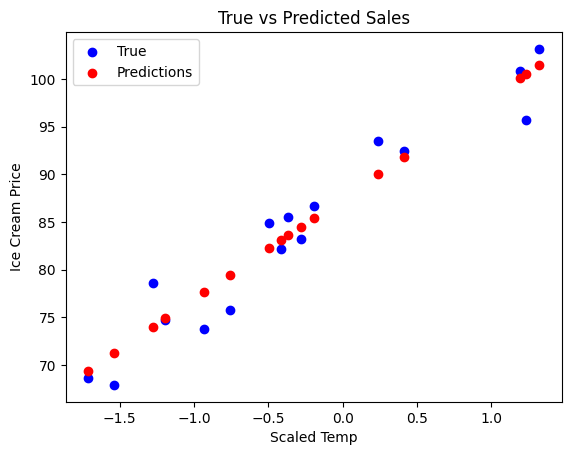

In [29]:
# Step 5: Model Evaluation
# Evaluate on test data

model.eval()# מצב הערכה
with torch.no_grad():
    predictions = model(X_test)
    plt.scatter(X_test.numpy(), y_test.numpy(), label='True', color='blue')
    plt.scatter(X_test.numpy(), predictions.numpy(), label='Predictions', color='red')
    plt.xlabel('Scaled Temp')
    plt.ylabel('Ice Cream Price')
    plt.title('True vs Predicted Sales')
    plt.legend()
    plt.show()

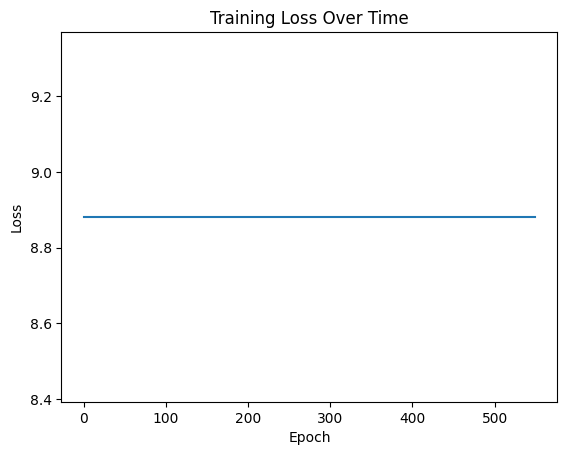

In [30]:
plt.plot(train_loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

[7811.42578125,
 7495.4326171875,
 7192.2978515625,
 6901.49755859375,
 6622.5283203125,
 6354.90625,
 6098.16552734375,
 5851.86474609375,
 5615.57421875,
 5388.8876953125,
 5171.412109375,
 4962.771484375,
 4762.6044921875,
 4570.56640625,
 4386.3251953125,
 4209.5625,
 4039.97314453125,
 3877.26513671875,
 3721.158203125,
 3571.382080078125,
 3427.679931640625,
 3289.80322265625,
 3157.515625,
 3030.5888671875,
 2908.8046875,
 2791.953857421875,
 2679.835693359375,
 2572.25732421875,
 2469.0341796875,
 2369.989013671875,
 2274.951904296875,
 2183.759765625,
 2096.25634765625,
 2012.291748046875,
 1931.721923828125,
 1854.4090576171875,
 1780.22119140625,
 1709.0306396484375,
 1640.7164306640625,
 1575.1611328125,
 1512.25341796875,
 1451.8853759765625,
 1393.9542236328125,
 1338.3607177734375,
 1285.010498046875,
 1233.8121337890625,
 1184.6788330078125,
 1137.5264892578125,
 1092.275146484375,
 1048.8475341796875,
 1007.1698608398438,
 967.1713256835938,
 928.783935546875,
 891.942